# Sequential Refinement with GSASII, using pySULI seqRefiner class

Add source code directory to the system path, in order to import gsas2_functions

In [1]:
import sys

sys.path += ['../src']

Import possibly useful directories.

In [2]:
import gsas2_functions as rf
import os
import xarray as xr
import numpy as np
import random
import string
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib widget

Set the path to the ncfiles (may be different on your machine).

In [3]:
nc_files_dir_path = 'example_data/seq_xrd_refinement_with_gsas2/nc_files'

Setting the specific files to use; note that I am filtering out invalid files by ensuring the start of the file has "20240122" in it.

In [4]:
file_names = [(nc_files_dir_path + '/'+ file) for file in np.sort(os.listdir(nc_files_dir_path)) if file[0:8] == "20240122"]

In [5]:
file_names

['example_data/seq_xrd_refinement_with_gsas2/nc_files/20240122-124546_count_uid=723d1713__CeO2_T_ramp_to_600C.nc',
 'example_data/seq_xrd_refinement_with_gsas2/nc_files/20240122-124618_count_uid=fe295dca__CeO2_T_ramp_to_600C.nc',
 'example_data/seq_xrd_refinement_with_gsas2/nc_files/20240122-124649_count_uid=8dbeea26__CeO2_T_ramp_to_600C.nc',
 'example_data/seq_xrd_refinement_with_gsas2/nc_files/20240122-124720_count_uid=efbf2cfd__CeO2_T_ramp_to_600C.nc',
 'example_data/seq_xrd_refinement_with_gsas2/nc_files/20240122-124752_count_uid=76daecd7__CeO2_T_ramp_to_600C.nc']

Creat the sequential refiner object from gsas2_functions.py directory. Note the paths may be different for you; GSASII_path will almost definitely be different, and requires installation on your machine.

In [6]:
myrefiner = rf.seqRefiner(
    nc_paths = file_names,
    phases = [{'cif_abs_path':'example_data/seq_xrd_refinement_with_gsas2/_cifs/CeO2.cif','phase_name':'CeO2','scale':1},],
    gsas2_scratch = None,
    q_range = (1,6),
    instrument_parameters_file = 'example_data/seq_xrd_refinement_with_gsas2/instprm_and_bkg/gsas.instprm',
    GSASII_path = '/opt/anaconda3/envs/GSASII/GSAS-II/GSASII',
    da_input_bkg = None,
    verbose = False
)

GSAS-II binary directory: /opt/anaconda3/envs/GSASII/GSAS-II/GSASII-bin/mac_64_p3.11_n1.26
7 values read from config file /opt/anaconda3/envs/GSASII/GSAS-II/GSASII/config.py
/Users/petermeshkov/Repos/pySULI/notebooks/example_data/seq_xrd_refinement_with_gsas2/_cifs/CeO2.cif read by Reader CIF
gpx file saved as /Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XVNX9FL.tmp/gsas.gpx
/Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XVNX9FL.tmp/data.xy read by Reader comma/tab/semicolon separated
Instrument parameters read: /Users/petermeshkov/Repos/pySULI/notebooks/example_data/seq_xrd_refinement_with_gsas2/instprm_and_bkg/gsas.instprm (G2 fmt) bank None
gpx file saved as /Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XVNX9FL.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XVNX9FL.tmp/gsas.gpx
/Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XV

Now run sequential refinement. Check out the source code for more options. Note that the LeBail does not work (we still need to look into this on our developing end).

In [7]:
myrefiner.refine_background(20)
myrefiner.refine_cell_params()
myrefiner.refine_strain_broadening()
myrefiner.refine_size_broadening()
myrefiner.refine_background(20)
myrefiner.refine_inst_parameters()

gpx file saved as /Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XVNX9FL.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XVNX9FL.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XVNX9FL.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XVNX9FL.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XVNX9FL.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/Repos/pySULI/notebooks/.gsas2_scratch/1721854724.58_XVNX9FL.tmp/gsas.gpx


Save the refinement; this part is mandatory for plotting later, as it saves the results of the refinements in to the ds_dict internal array of data.

In [8]:
gpx, ds_dict = myrefiner.save_refinement()

Plots the covariance matrix for the refined variables, note that it only plots the variables currently set to refined as true. It is not diagonal which makes no sense, and needs to be further analyzed on our end.

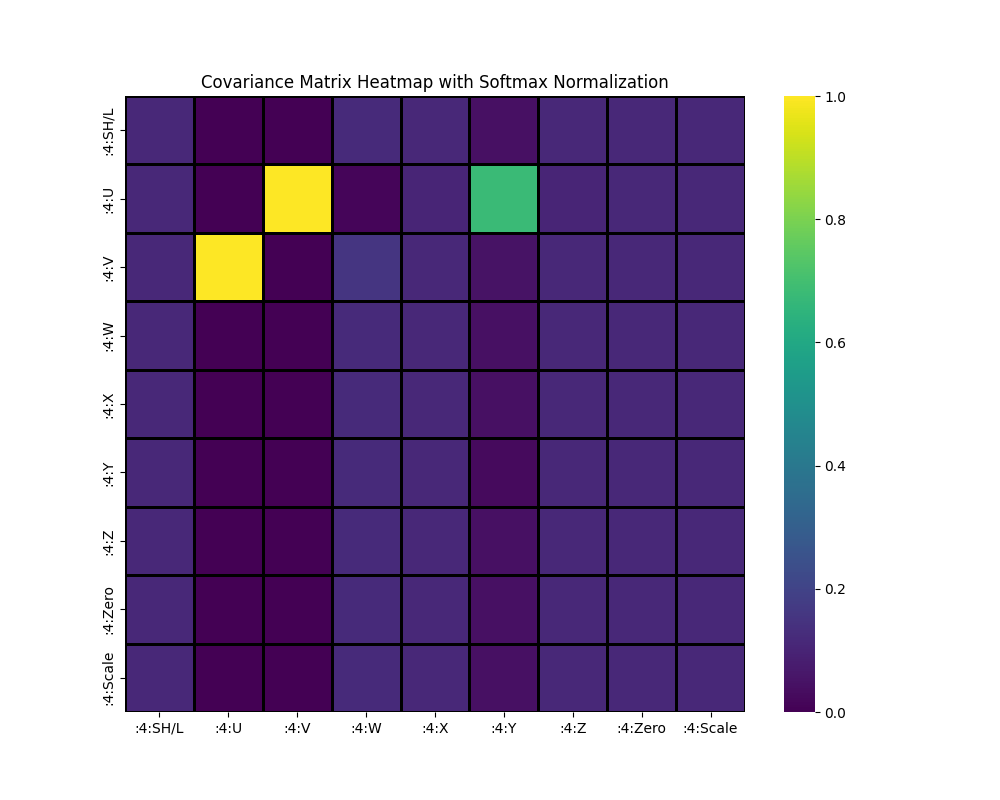

In [9]:
myrefiner.plot_cov_matrix()

Create a gif of the refinement results! it will be saves as some file "sequential_ref[random number].gif".

6it [00:00,  7.74it/s]                                                          


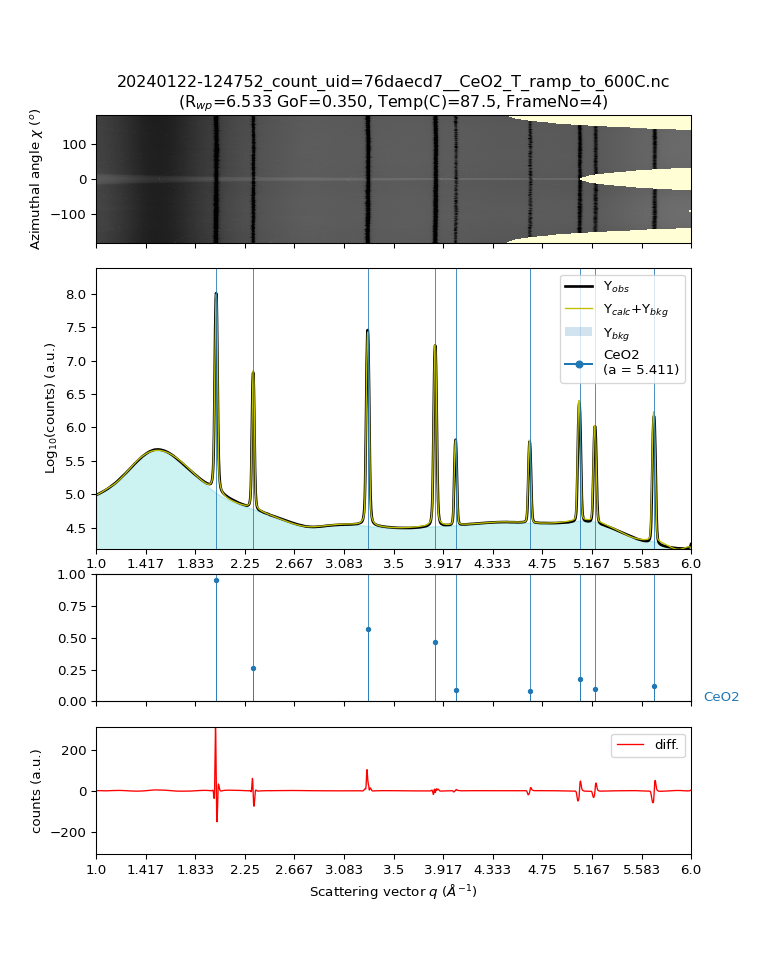

In [10]:
myrefiner.plot_all()